# Topics in Quantitative Finance, Summer 2020 

## Lecture 3: The Black-Merton-Scholes model and beyond

### Tai-Ho Wang (王 太 和)
    
<h2><img src="BCstacked_blk.jpg" align = "center" height=50 width=190></h2>

$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\F}{\mathcal{F} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\Etof}[1]{\mathbb{E}_t\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\p}{\partial}
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\R}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\Hess}{\mathrm{Hess} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bit}{\begin{itemize}}
\newcommand{\eit}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\tr}{\mbox{tr}}
$$



## Agenda

- Black-Merton-Scholes model
- Black-Merton-Scholes formula for call and put options
- Greeks
- Dynamic hedging
- Delta and delta-gamma hedges
- Local volatility model
- Stochastic volatility model

## Black-Merton-Scholes

From the [Wikipage](https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model):

- The Black–Scholes or Black–Scholes–Merton model is a mathematical model for the dynamics of a financial market containing derivative investment instruments. From the partial differential equation in the model, known as the Black–Scholes equation, one can deduce the Black–Scholes formula, which gives a theoretical estimate of the price of European-style options and shows that the option has a unique price regardless of the <font color=red>risk of the security</font> and its expected return (instead replacing the security's expected return with the risk-neutral rate). The formula led to a boom in options trading and provided mathematical legitimacy to the activities of the Chicago Board Options Exchange and other options markets around the world. It is widely used, although often with adjustments and corrections, by options market participants.

- The key idea behind the model is to hedge the option by buying and selling the underlying asset in just the right way and, as a consequence, to eliminate risk. This type of hedging is called "continuously revised delta hedging" and is the basis of more complicated hedging strategies such as those engaged in by investment banks and hedge funds. 

- The Black–Scholes formula has only one parameter that cannot be directly observed in the market: the average future volatility of the underlying asset, though it can be found from the price of other options. Since the option value (whether put or call) is increasing in this parameter, it can be inverted to produce a "volatility surface" (<font color=blue>implied volatility</font>) that is then used to calibrate other models (<font color=blue>(exotic) derivatives</font>), e.g. for OTC derivatives. 

## The Black-Scholes world

The Black–Scholes model assumes that the market consists of at least one risky asset, usually called the stock, and one riskless asset, usually called the money market, cash, or bond.

Assumptions on the assets:

- (riskless rate) The rate of return on the riskless asset is constant and thus called the risk-free interest rate.
- (Brownian motion) The instantaneous log return of stock price is a Brownian motion with drift; and we will assume its drift and volatility are constant (if they are time-varying, we can deduce a suitably modified Black–Scholes formula quite simply, as long as the volatility is not random). As a result, the stock price follows a geometric Brownian motion. 
- The stock does not pay dividend.

Assumptions on the market:

- There exists no arbitrage opportunity.
- It is possible to borrow and lend any amount, even fractional, of cash at the riskless rate.
- It is possible to buy and sell any amount, even fractional, of the stock, including short selling.
- Frictionless market: the transactions do not incur any fees or costs.


## Black-Scholes model

Assume the price of the underlying asset follows the stochastic differential equation

$$
\frac{dS_t}{S_t} = \mu dt + \sigma dW_t,
$$

where

- $\mu$: (constant) expected return 
- $\sigma$: (constant) volatility 
- $W_t$: standard Brownian motion

For each time $t$, $S_t$ is lognormally distributed. More precisely,

$$
S_t \sim S_0 \exp\left[\left(\mu - \frac{\sigma^2}{2}\right)t + \sigma \sqrt t Z \right]
$$

where $Z$ is a standard normal random variable.

#### Note
$S_t$ has the closed form expression

$$
S_t = S_0 e^{\left(\mu - \frac{\sigma^2}2 \right) t+ \sigma W_t}
$$

and is called a *geometric Brownian motion*.

## Pricing under the Black-Scholes model

Assume the price of a call option $C$ is a (smooth enough) function of the calendar time $t$ and the underlying asset $S$. Consider the portfolio $\Pi$ consisting of selling a call option and holding $\Delta$ shares of $S$.

- The value of $\Pi$ at time $t$ is
$$
\Pi_t =  C(t, S_t) - \Delta S_t
$$

- Self-financing strategy

$$
d \Pi_t =  dC_t - \Delta dS_t
$$

- The change of call price is given by

\begin{eqnarray*}
dC(t,S_t) &=& C_t dt + C_S dS_t + \frac12 C_{SS} (dS_t)^2  \\
&=& C_S \sigma S dW_t + \left( C_t + \frac12 \sigma^2 S^2 C_{SS} + \mu S C_S \right) dt
\end{eqnarray*}

- Hence the infinitesimal change of $\Pi$ at time $t$ is

\begin{eqnarray*}
d \Pi_t &=& dC_t - \Delta dS_t   \\
&=& \left[ C_t + \frac12 \sigma^2 S^2 C_{SS} + \mu S (C_S - \Delta) \right] dt + \sigma S (C_S - \Delta) dW_t
\end{eqnarray*}

#### Note
$(dS_t)^2 = \sigma^2 S_t^2 dt$

- Let $\Delta = C_S$, i.e., hold this amount $C_S(t,S_t)$ of underlying assets in the portfolio $\Pi$. Then the infinitesimal change of $\Pi$ becomes

$$
\displaystyle d\Pi_t = \left( C_t + \frac12 \sigma^2 S^2 C_{SS} \right) dt
$$

- On the other hand, with this choice of $\Delta$, $\Pi$ is riskless (non-random) hence must be like cash in bank account (Arbitrage Pricing Theory), i.e.,

$$
d\Pi_t = r \Pi_t dt = r(C - \Delta S)dt = r(C - C_S S) dt,
$$
   
where $r$ is the interest rate.


## Black-Scholes PDE

We conclude that the price $C$ of a call option satisfies

\begin{eqnarray*}
   \frac{\p C}{\p t} + \frac{\sigma^2}{2}S^2\frac{\p C^2}{\p S^2} + rS\frac{\p C}{\p S} - rC = 0,
   \mbox{ for } 0 < S < \infty, \quad 0 \leq t < T
\end{eqnarray*}

with terminal condition

$$
C(T,S) = (S - K)^+
$$

and boundary conditions

\begin{eqnarray*}
   && C(t,0) = 0  \\
   && C(t,S) \sim S - K e^{-rt} \mbox{ as } S \to\infty
\end{eqnarray*}

#### Note
The Black-Scholes pricing PDE does not depend on the drift $\mu$.

## Solving Black-Scholes PDE

$$
\frac{\p C}{\p t} + \frac{\sigma^2}{2}S^2\frac{\p C^2}{\p S^2} + rS\frac{\p C}{\p S} - rC = 0
$$

- $\tau = T - t$

$$
\frac{\p C}{\p \tau} = \frac{\sigma^2}{2}S^2\frac{\p C^2}{\p S^2} + rS\frac{\p C}{\p S} - rC
$$

- $ \xi = \ln S$

$$
\frac{\p C}{\p \tau} = \frac{\sigma^2}{2}\frac{\p C^2}{\p \xi^2} + \left( r -\frac{\sigma^2}{2} \right) \frac{\p C}{\p \xi} - rC
$$

- $c(\xi,\tau) = e^{r\tau}C(\xi,\tau)$

$$
\frac{\p c}{\p \tau} = \frac{\sigma^2}{2}\frac{\p c^2}{\p \xi^2} + \left( r -\frac{\sigma^2}{2} \right) \frac{\p c}{\p \xi}
$$

- $x = \xi + \left( r - \frac{\sigma^2}{2} \right) \tau $

$$
\frac{\p c}{\p \tau} = \frac{\sigma^2}{2} \frac{\p^2 c}{\p x^2}
$$

In total, we have done the transformation

\begin{eqnarray*}
&& \tau = T - t  \\
&& x = \ln S + \left( r - \frac{\sigma^2}{2} \right) (T - t)  \\
&& c = e^{r(T-t)}C
\end{eqnarray*}

which transforms Black-Scholes equation into heat equation.

## The Black-Scholes formula 

For call

$$
C = S e^{-d\tau} N(d_1) - K e^{-r\tau} N(d_2)
$$

where $\tau$ is time to expiry, $N(\cdot)$ denotes the cdf for standard normal, and 

$$
d_1 = \frac{\log\left(\frac{Se^{-d\tau}}{Ke^{-r\tau}}\right)}{\sigma\sqrt\tau}+ \frac{\sigma\sqrt\tau}2, \qquad d_2 = d_1 - \sigma \sqrt\tau
$$

For put

$$
P = K e^{-r\tau} N(-d_2) - S e^{-d\tau} N(-d_1).
$$

### Note
- Put-call parity

    $$
    C - P = S e^{-d\tau} - K e^{-r\tau}.
    $$
    
- Financial meaning of $N(d_1)$ and $N(d_2)$

In [1]:
rnorm(10) # generate standard normal 
pnorm # cdf of standard normal
dnorm # pdf for standard normal
qnorm # quantile funciton

[1]  0.27823602  0.33150456  0.06563162  0.00886435 -1.62023796  1.21349657
 [7]  1.06457301 -1.19467845  1.28409394 -0.68683172

function (q, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE) 
.Call(C_pnorm, q, mean, sd, lower.tail, log.p)
<bytecode: 0x0256e8ec>
<environment: namespace:stats>

function (x, mean = 0, sd = 1, log = FALSE) 
.Call(C_dnorm, x, mean, sd, log)
<bytecode: 0x05d5837c>
<environment: namespace:stats>

function (p, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE) 
.Call(C_qnorm, p, mean, sd, lower.tail, log.p)
<bytecode: 0x02f54110>
<environment: namespace:stats>

[1] 0.5

In [2]:
pnorm(0) # This is N(0) in our notation
pnorm(c(-9, -2, -1, 0, 1, 2, 3, 4, 9))

[1] 0.5

[1] 1.128588e-19 2.275013e-02 1.586553e-01 5.000000e-01 8.413447e-01
[6] 9.772499e-01 9.986501e-01 9.999683e-01 1.000000e+00

In [6]:
# rescale plot
options(repr.plot.width=6, repr.plot.height=4.5)

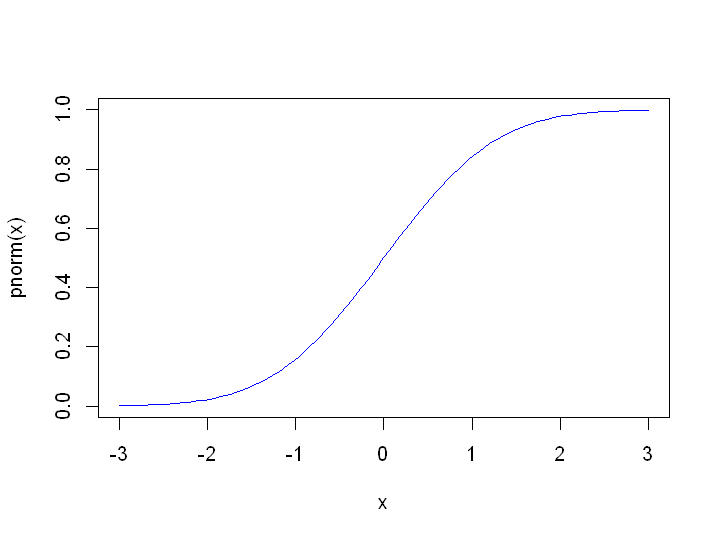

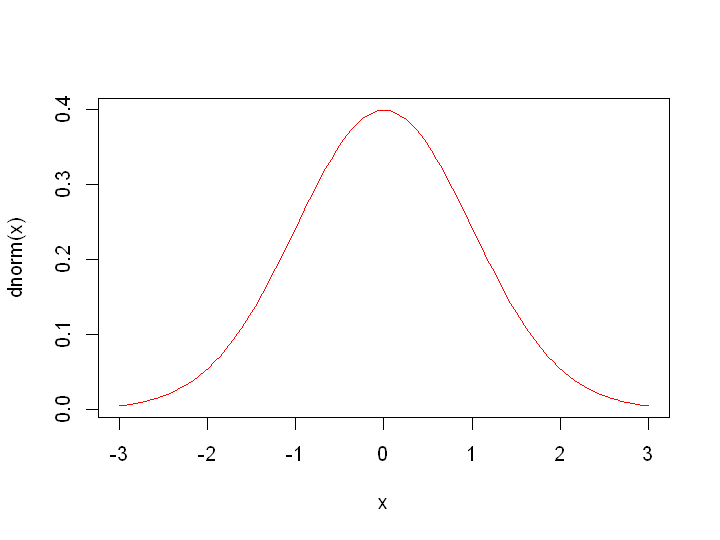

In [4]:
curve(pnorm, from=-3, to=3, col='blue')
curve(dnorm, from=-3, to=3, col='red')

In [1]:
# Black-Scholes formula
bsCall <- function(s, K, sigma, t, r=0, d=0){
    d1 <- (log(s/K) + (r - d)*t)/(sigma*sqrt(t)) + sigma*sqrt(t)/2
    d2 <- d1 - sigma*sqrt(t)
    
    c <- s*exp(-d*t)*pnorm(d1) - K*exp(-r*t)*pnorm(d2)
    delta <- exp(-d*t)*pnorm(d1)
    Gam <- dnorm(d1)/s/sigma/sqrt(t)
    
    data.frame(c, delta, Gam)
}

bsPut <- function(s, K, sigma, t, r=0, d=0){
    d1 <- (log(s/K) + (r - d)*t)/(sigma*sqrt(t)) + sigma*sqrt(t)/2
    d2 <- d1 - sigma*sqrt(t)
    
    p <- K*exp(-r*t)*pnorm(-d2) - s*exp(-d*t)*pnorm(-d1)
    delta <- -exp(-d*t)*pnorm(-d1)
    Gam <- dnorm(d1)/s/sigma/sqrt(t)
    
    data.frame(p, delta, Gam)
}

In [2]:
bsCall(K=100, s=100, t=1, sigma=.3)
bsCall(K=100, s=100, t=1, sigma=.3, r=0.05)
bsCall(100, 100, 1, .3)

c,delta,Gam
<dbl>,<dbl>,<dbl>
11.92354,0.5596177,0.01314931


c,delta,Gam
<dbl>,<dbl>,<dbl>
14.23125,0.6242517,0.01264776


c,delta,Gam
<dbl>,<dbl>,<dbl>
21.58088,0.6079044,0.007015577


In [3]:
# rescale the plot
options(repr.plot.width=6, repr.plot.height=4.5)

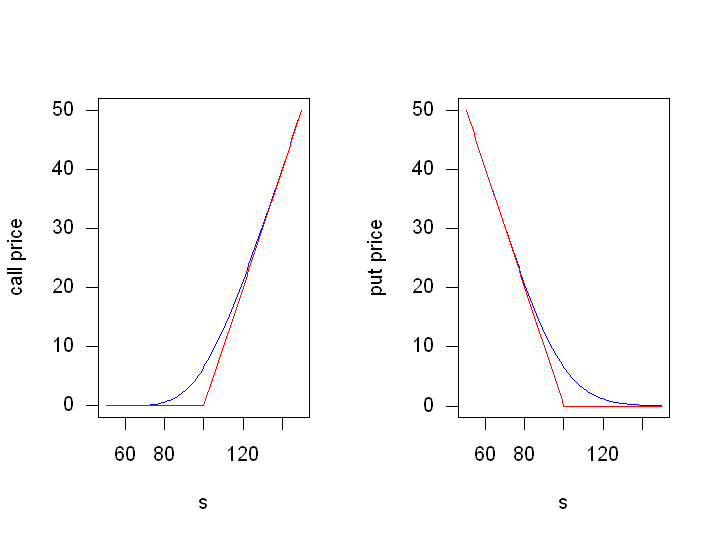

In [4]:
# option price as a function of the underlying
K <- 100
sig <- 0.3
Texp <- 0.3

# payoffs of call and put
payoffC <- function(s, k) {(s - k)*(s > k)}
payoffP <- function(s, k) {(k - s)*(k > s)}

# some temp functions
tmpc <- function(x) bsCall(x, K, sig, Texp)$c
tmpp <- function(x) bsPut(x, K, sig, Texp)$p
tmpPayoffc <- function(x) payoffC(x, K)
tmpPayoffp <- function(x) payoffP(x, K)

# plot
par(mfrow=c(1, 2))
curve(tmpc, from=50, to=150, col='blue', xlab='s', ylab='call price', las=1)
curve(tmpPayoffc, from=50, to=150, col='red', add=TRUE)
curve(tmpp, from=50, to=150, col='blue', xlab='s', ylab='put price', las=1)
curve(tmpPayoffp, from=50, to=150, col='red', add=TRUE)
par(mfrow=c(1, 1))

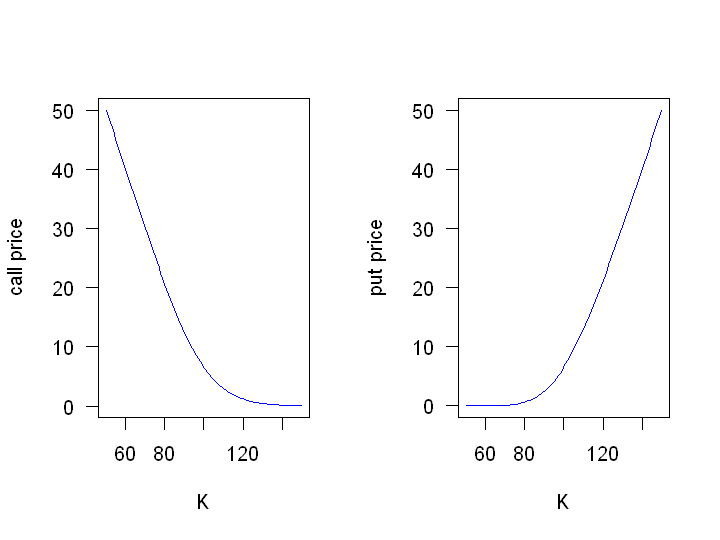

In [10]:
# option price as a function of strike
S <- 100
sig <- 0.3
Texp <- 0.3

tmpc <- function(x) bsCall(S, x, sig, Texp)$c
tmpp <- function(x) bsPut(S, x, sig, Texp)$p

# plot
par(mfrow=c(1, 2))
curve(tmpc, from=50, to=150, col='blue', xlab='K', ylab='call price', las=1)
curve(tmpp, from=50, to=150, col='blue', xlab='K', ylab='put price', las=1)
par(mfrow=c(1, 1))

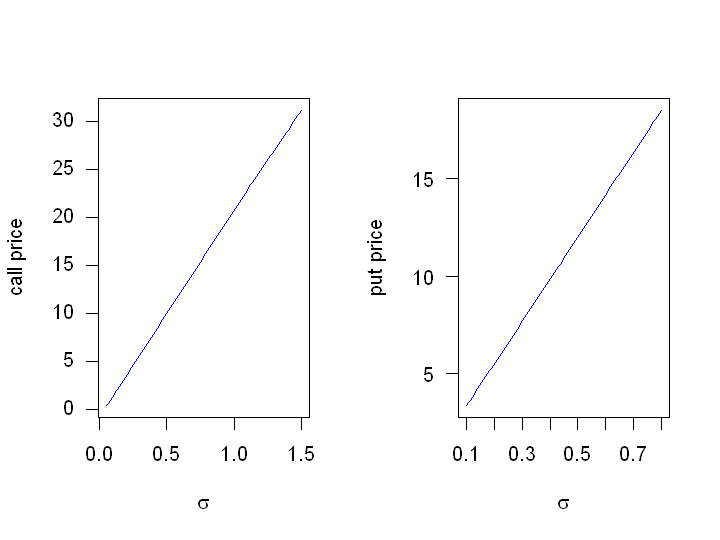

In [5]:
# option price as a function of volatility
S <- 100
K <- 102
Texp <- 0.3

tmpc <- function(x) bsCall(S, K, x, Texp)$c
tmpp <- function(x) bsPut(S, K, x, Texp)$p

# plot
par(mfrow=c(1, 2))
curve(tmpc, from=0.05, to=1.5, col='blue', xlab=expression(sigma), ylab='call price', 
      las=1)
curve(tmpp, from=0.1, to=0.8, col='blue', xlab=expression(sigma), ylab='put price', las=1)
par(mfrow=c(1, 1))

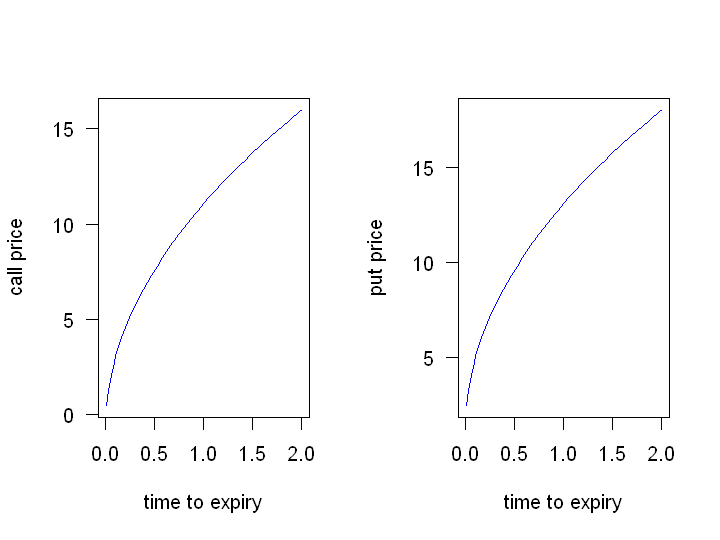

In [7]:
# option price as a function of time to expiry
S <- 100
K <- 102
sig <- 0.3

tmpc <- function(x) bsCall(S, K, sig, x)$c
tmpp <- function(x) bsPut(S, K, sig, x)$p

# plot
par(mfrow=c(1, 2))
curve(tmpc, from=0.01, to=2, col='blue', xlab='time to expiry', ylab='call price', 
      las=1)
curve(tmpp, from=0.01, to=2, col='blue', xlab='time to expiry', ylab='put price', las=1)
par(mfrow=c(1, 1))

## Sensitivities of option prices in Black-Scholes model - the Greeks

Assume the dividend rate $d = 0$.

- For call:
    - $\Delta_C = \frac{\p C}{\p S} = N(d_1)$
    - Dual $\Delta_C^K = \frac{\p C}{\p K} = -e^{-rT} N(d_2)$ 
    - $\Gamma = \frac{\p^2 C}{\p S^2} = \frac{n(d_1)}{S\sigma\sqrt T}$
    - $\Theta_C = \frac{\p C}{\p T} = \frac{S \sigma}{2\sqrt T} n(d_1) + r K e^{-rT} N(d_2)$
    - $\nu \, (\mbox{vega}) = \frac{\p C}{\p \sigma} = S \sqrt T \, n(d_1) $
    - $\rho_C = \frac{\p C}{\p r} = K T e^{-rT} N(d_2)$

- For put:
    - $\Delta_P = \frac{\p P}{\p S} = \Delta_C - 1 = -N(-d_1)$
    - Dual $\Delta_P^K = \frac{\p P}{\p K} = \Delta_C^K + e^{-r T} = e^{-rT} N(-d_2)$ 
    - $\Gamma = \frac{\p^2 P}{\p S^2} = \frac{\p^2 C}{\p S^2}$
    - $\Theta_P = \frac{\p P}{\p T} = \Theta_C - r e^{-rT} K = \frac{S \sigma}{2\sqrt T} n(d_1) - r K e^{-rT} N(-d_2)$
    - $\nu \, (\mbox{vega}) = \frac{\p P}{\p \sigma} = \frac{\p C}{\p \sigma} = S \sqrt T N(d_1)$
    - $\rho_P = \frac{\p P}{\p r} = \rho_C - T e^{-rT} K = -K T e^{-rT} N(-d_2)$
    
#### Note
- $n(x) = N'(x)$ is the pdf for standard normal.
- $\Theta_C > 0$, whereas $\Theta_P$ may be negative if $r > 0$.

## Delta hedging

The portfolio used in deriving the Black-Scholes PDE is called *delta-hedging*.


### An example on delta hedge

In [8]:
r <- 0
sigma <- 0.3
K <- 11
S0 <- 10
dt <- 1/252 # one day 
t <- 1/4 # a quarter of year, 3 month

c <- bsCall(S0, K, sigma, t, r)$c
delta <- bsCall(S0, K, sigma, t, r)$delta
s <- S0 + seq(-1, 1, by=0.1)
print(c) 
print(delta)
s
bsCall(s, K, sigma, t=t-dt, r)$c
delta*S0 - c

[1] 0.2500245
[1] 0.2876029


[1]  9.0  9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.0 10.1 10.2 10.3 10.4
[16] 10.5 10.6 10.7 10.8 10.9 11.0

[1] 0.06062519 0.07143573 0.08368047 0.09747022 0.11291427 0.13011917
 [7] 0.14918759 0.17021726 0.19329992 0.21852036 0.24595560 0.27567411
[13] 0.30773525 0.34218873 0.37907433 0.41842163 0.46024995 0.50456843
[19] 0.55137619 0.60066258 0.65240764

[1] 2.626005

pnl.naked,pnl.delta
<dbl>,<dbl>
0.189399289,-0.0982036186
0.178588747,-0.0802538698
0.166344015,-0.0637383109
0.152554258,-0.0487677766
0.137110207,-0.0354515373
0.119905314,-0.0238961398
0.100836895,-0.0142042683
0.079807223,-0.0064736489
0.056724564,-0.0007960173


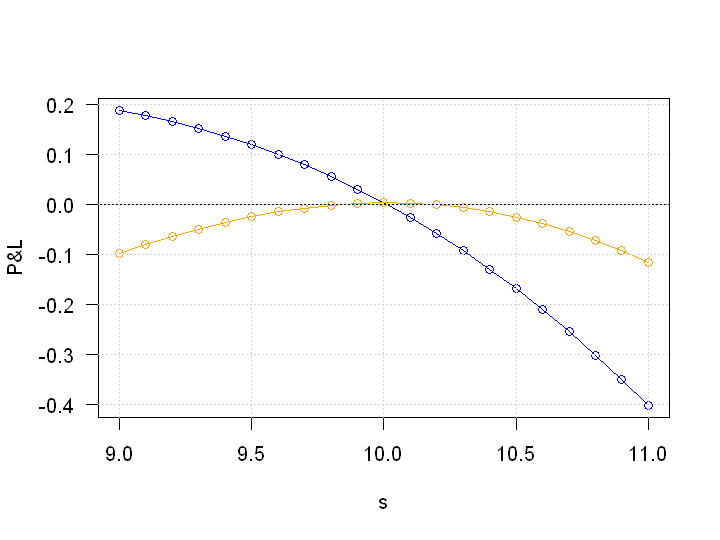

In [9]:
pnl.naked <- c - bsCall(s, K, sigma, t=t-dt, r)$c
pnl.delta <- delta*s - bsCall(s, K, sigma, t=t-dt, r)$c - (delta*S0 - c)
data.frame(pnl.naked, pnl.delta)

# plot
plot(s, pnl.naked, col='blue', type='o', ylab='P&L', las=1)
points(s, pnl.delta, col='orange', type='o')
abline(h=0)
grid()

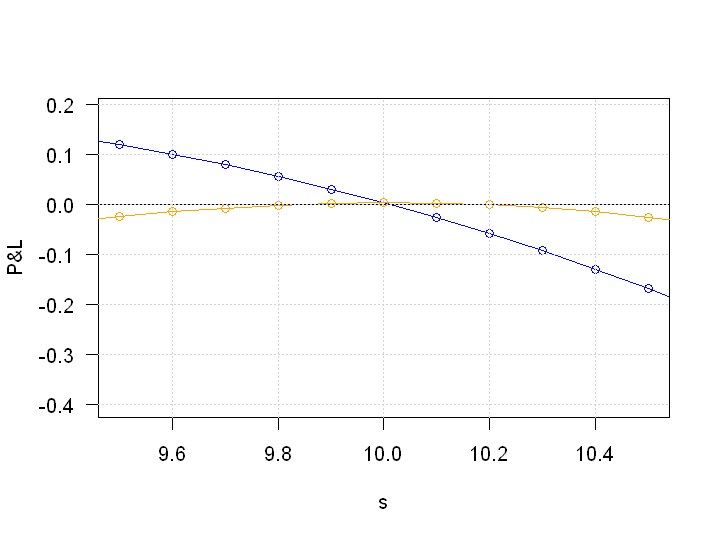

In [11]:
# zoom into the interval [9.5, 10.5]
plot(s, pnl.naked, col='blue', type='o', xlim=c(9.5, 10.5), ylab='P&L', las=1)
points(s, pnl.delta, col='orange', type='o')
abline(h=0)
grid()

## An exmaple on delta-gamma hedge

<font color=blue> Note </font>
The gammas of the underlying and forward are zero. To construct a delta-gamma hedge portfolio we need to add into the portfolio an instrument that has nonzero gamma, say, call or put options.

,s,pnl.naked,pnl.delta,pnl.delta.Gam
1,9,0.1893993,-0.09820362,-0.02526582
2,9.1,0.1785887,-0.08025387,-0.0189133
3,9.2,0.166344,-0.06373831,-0.013499
4,9.3,0.1525543,-0.04876778,-0.009027999
5,9.4,0.1371102,-0.03545154,-0.005486605
6,9.5,0.1199053,-0.02389614,-0.002839526
7,9.6,0.1008369,-0.01420427,-0.001027037
8,9.7,0.07980722,-0.006473649,3.774867e-05
9,9.8,0.05672456,-0.0007960173,0.0004714487
10,9.9,0.03150412,0.00274383,0.0004227795


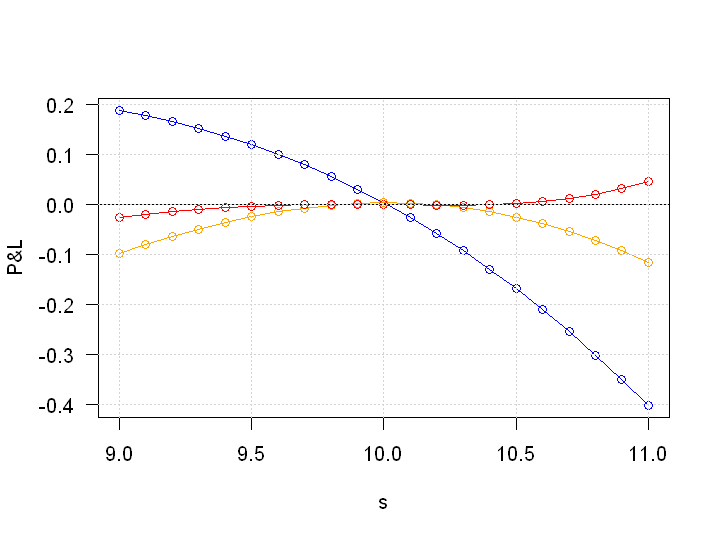

In [21]:
r <- 0
sigma <- 0.3
K <- 11
S0 <- 10
dt <- 1/252
t <- 1/4


# target call
c <- bsCall(S0, K, sigma, t, r)$c
delta <- bsCall(S0, K, sigma, t, r)$delta
Gam <- bsCall(S0, K, sigma, t, r)$Gam

# call for hedging
K.hg <- 14
c.hg <- bsCall(S0, K.hg, sigma, t, r)$c
delta.hg <- bsCall(S0, K.hg, sigma, t, r)$delta
Gam.hg <- bsCall(S0, K.hg, sigma, t, r)$Gam

# 1 day later
s <- S0 + seq(-1, 1, by=0.1)
pnl.naked <- c - bsCall(s, K, sigma, t=t-dt, r)$c
pnl.delta <- delta*s - bsCall(s, K, sigma, t=t-dt, r)$c - (delta*S0 - c)
delta.dG <- delta - Gam/Gam.hg*delta.hg
Gam.dG <- Gam/Gam.hg
pnl.delta.Gam <- delta.dG*s + Gam.dG*bsCall(s, K.hg, sigma, t=t-dt, r)$c - bsCall(s, K, sigma, t=t-dt, r)$c - (delta.dG*S0 + Gam.dG*c.hg  - c)

# plot
plot(s, pnl.naked, col='blue', type='o', ylab='P&L', las=1)
points(s, pnl.delta, col='orange', type='o')
points(s, pnl.delta.Gam, col='red', type='o')
abline(h=0)
grid()
data.frame(s, pnl.naked, pnl.delta, pnl.delta.Gam)

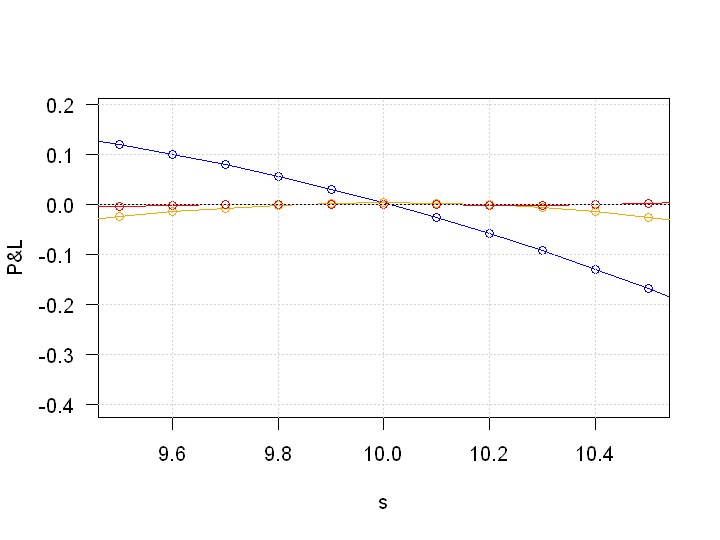

In [49]:
# zoom in 
# plot
plot(s, pnl.naked, col='blue', type='o', xlim=c(9.5, 10.5), ylab='P&L', las=1)
points(s, pnl.delta, col='orange', type='o')
points(s, pnl.delta.Gam, col='red', type='o')
abline(h=0)
grid()

## Dynamical hedging

As market conditions evolve, to maintain the delta neutrality of the portfolio, ideally we should dynamically change the holdings in the porfolio. For example,  

### An example on dynamical hedging

In [12]:
# parameter
r <- 0
sigma <- 0.3
K <- 11

S0 <- 10
dt <- 1/252
t <- 1/4
days_forward <- 30

# portfolio positions in cash, options, underlying
# x : number of shares in underlying
# y : dollars in cash
# z : number of options

# short 1000 calls
z <- -1000

# current price and delta of call
c <- bsCall(S0, K, sigma, t, r)$c
delta <- bsCall(S0, K, sigma, t, r)$delta

# construct a zero value and delta neutral portfolio
x <- delta*(-z)
y <- -(x*S0 + z*c)
port.value <- x*S0 + y + z*c
port.delta <- x + z*delta
s <- S0
pnl.cum <- 0
data.frame(port.value, port.delta, pnl.cum, s, c, x, y, z*delta)

port.value,port.delta,pnl.cum,s,c,x,y,z...delta
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-8.526513e-14,0,0,10,0.2500245,287.6029,-2626.005,-287.6029


In [27]:

# 1 day later
i <- 1
s_new <- S0*exp((r - sigma^2/2)*dt + sigma*sqrt(dt)*rnorm(1)) # sample a new stock price
c_new <- bsCall(s_new, K, sigma, t-i*dt, r)$c
delta_new <- bsCall(s_new, K, sigma, t-i*dt, r)$delta

# portfolio value before rebalance 
port.value_new <- x*s_new + y*exp(r*i*dt) + z*c_new
pnl.cum <- pnl.cum + port.value_new - port.value

# rebalance to delta neutral
x_new <- delta_new*(-z)
y_new <- y*exp(r*i*dt) + (x - x_new)*s_new
port.value <- x_new*s_new + y_new + z*c_new
port.delta <- x_new + z*delta_new
s <- s_new
c <- c_new
x <- x_new
delta <- delta_new
y <- y_new

# display the result
data.frame(port.value, s, c, y, x)

,port.value,s,c,y,x
1,-31.69408,10.14972,0.29132,-2993.616,320.5252


In [14]:
# Let's see how it works for 30 days forward
# initialize data
port.value <- 0*(1:days_forward)
s <- S0 + 0*(1:days_forward)
calls <- c + 0*(1:days_forward)
deltas <- delta + 0*(1:days_forward)
shares <- x + 0*(1:days_forward)
cash <- y + 0*(1:days_forward)

for (i in 1:(days_forward-1)){
    # sample a stock price
    s[i+1] <- s[i]*exp((r - sigma^2/2)*dt + sigma*sqrt(dt)*rnorm(1)) 
    
    # calculate new call price and delta
    calls[i+1] <- bsCall(s[i+1], K, sigma, t-i*dt, r)$c
    deltas[i+1] <- bsCall(s[i+1], K, sigma, t-i*dt, r)$delta
  
    # portfolio value before rebalance 
    port.value[i+1] <- shares[i]*s[i+1] + cash[i]*exp(r*dt) + z*calls[i+1]
  
    # rebalance (self-finacing) to delta neutral
    shares[i+1] <- deltas[i+1]*(-z)
    cash[i+1] <- cash[i]*exp(r*dt) + (shares[i] - shares[i+1])*s[i+1]
}

# display the result
data.frame(port.value, s, calls, shares, cash)

port.value,s,calls,shares,cash
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.0000000,10.00000,0.2500245,287.6029,-2626.005
-3.2722088,10.25926,0.3278596,346.7548,-3232.859
0.4537765,10.34876,0.3551694,367.0513,-3442.903
-1.9758933,10.59409,0.4476471,427.1406,-4079.495
-9.1160896,10.28767,0.3239051,348.7759,-3273.304
-4.4201656,10.28683,0.3189143,346.8736,-3253.735
-1.3534472,10.40854,0.3580679,375.9927,-3556.822
-2.0440659,10.62341,0.4395469,430.3000,-4133.751
3.1376155,10.59844,0.4236201,422.5927,-4052.066


## Implied volatility

"A wrong number to a wrong formula for a correct answer."

- In the Black-Scholes model there is a one-to-one correspondence between the price of the option and the volatility parameter $\sigma$ (Why?). The option prices are often quoted by stating this specific volatility, called the *implied volatility*.

- In Black-Scholes world, the volatility is assumed constant. But in reality, options of different strike require different volatilities to match their market prices. This is called the *volatility smile*.

## Volatility smile of SPX on Sep-15, 2011

<img src="spxImpVol.jpg" align = "center" height=600 width=600>

## Resolutions to smile

Approaches to resolve the skew/smile problem
- Local volatility model
    - Assume the volatility is a function of the underlying asset and time.
    - Market is complete.
    - Volatility function is recoverable from the market data (Dupire formula) - easy to calibrate.
    - Dupire (diffusion model), Derman-Kani(Markov chain model)

- Stochastic volatility model
    - Assume the volatility itself follows another stochastic process.
    - Incomplete market.
    - Volatility of volatility is unobservable
    - Heston's model, SABR model, Hull-White model, etc.

- Jump diffusion models (e.g. Merton jump diffusion), exponential Levy models (e.g. CGMY), etc.


## Local volatility model

The local volatility model assumes that the evolution of the price $S_t$ of the underlying under risk neutral probability (with zero interest rate) is governed by the SDE
$$
\frac{dS_t}{S_t} =  \sigma_\ell (S_t,t) dW_t.
$$

$\sigma_\ell$ is referred to as the *local volatility function*. In other words, rather than taking the volatility as a constant as in the Black-Scholes model, the local volatility model allows the volatility to depend on, and only on, the underlying price $s$ and time $t$.

The associated pricing equation for the local volatility model (assume interest rate $r=0$) is given by

$$
\frac{\p u}{\p t} + \frac{\sigma_\ell^2(s,t)}{2}s^2\frac{\p^2 u}{\p s^2} = 0.
$$

In addition to being a complete market, one fascinating feature of the local volatility model is that the local volatility function $\sigma_\ell$ ideally can be read off from the marekt data of vanilla calls by applying the Dupire's formula

$$
\sigma^2_\ell(K,T) = \frac{\frac{\p C}{\p T}}{\frac12 K^2 \frac{\p^2 C}{\p K^2}}
$$

should one observe the premia of calls for all strikes $K$ and expiries $T$. In practice, we have far less observed data; a method of interpolating/extrapolating the lacking call premia is required to determine the local volatility function $\sigma_\ell$.  


## Example - Bachelier model

The Bachelier model can be regarded as a local volatility model with the local volatility function given by $\sigma_\ell(s) = \frac{\sigma}s$. Hence, the model reads

$$
dS_t = \sigma dW_t \quad \Longleftrightarrow \quad S_t = S_0 + \sigma W_t.
$$

In other words, the price of the underlying evolves as a (shifted and rescaled) Brownian motion. The associated pricing equation in the Bachelier model reads 

$$
\frac{\p u}{\p t} + \frac{\sigma^2}{2} \frac{\p^2 u}{\p s^2} = 0,
$$

which is the classcial (backward) heat equation, and the premium $c$ of call struck at $K$ with time-to-expiry $\tau$ is given by 

$$
c = \frac{\sigma\sqrt\tau}{\sqrt{2\pi}} \, e^{-\frac{(s - K)^2}{2\sigma^2\tau}} + (s - K) \, N\left(\frac{s - K}{\sigma\sqrt\tau}\right).
$$


## Louis Bachelier

<h2><img src="https://upload.wikimedia.org/wikipedia/commons/3/3b/LouisBachelier.jpg" align = "center" width=160></h2> 
<br>
Courtesy: Photo from Wikipedia
<br>

Quotes from the [Wikipage](https://en.wikipedia.org/wiki/Louis_Bachelier)

>Louis Jean-Baptiste Alphonse Bachelier (French: [baʃəlje]; March 11, 1870 – April 28, 1946) was a French mathematician at the turn of the 20th century. He is credited with being the first person to model the stochastic process now called Brownian motion, as part of his PhD thesis The Theory of Speculation (Théorie de la spéculation, published 1900).

>Bachelier’s Doctoral thesis, which introduced for the first time a mathematical model of Brownian motion and its use for valuing stock options, is historically the first paper to use advanced mathematics in the study of finance. Thus, Bachelier is considered as the forefather of mathematical finance and a pioneer in the study of stochastic processes. 

## Example - CEV model

The constant elasticity of variance (CEV) model is a local volatility model with the local volatility function given by a power function in the price of the underlying. Specifically, the CEV model reads

$$
\frac{dS_t}{S_t} = \alpha S_t^\beta dW_t
$$

with $\alpha > 0$ and $\beta > -1$. The associated pricing equation in the CEV model reads 

$$
\frac{\p u}{\p t} + \frac{\alpha^2}2 s^{2 + 2\beta} \frac{\p^2 u}{\p s^2} = 0.
$$

### Note
- $\beta = -1$ is the Bachelier model.
- $\beta < 0$ corresponds to leverage effect which is usually observed in equity markets.
- $\beta > 0$ corresponds to reverse leverage effect often observed in commodity markets


## Stochastic volatility model

Stochastic volatility models impose that the volatility (or equivalently the variance) *per se* is a stochastic process which may or may not be correlated to the driving Brownian motion of the underlying. A generic stochastic volatility model is of the form

\begin{eqnarray*}
&& \frac{dS_t}{S_t} = \sqrt{v_t} \, dW_t, \\
&& d v_t = a(t, v_t) dt + b(t, v_t) \, dZ_t,
\end{eqnarray*}

where $W_t$ and $Z_t$ are correlated Brownian motions with correlation $\rho$. The process $v_t$ is usually referred to as the *instantaneous variance* and its square root $\sigma_t := \sqrt{v_t}$ the *instantaneous volatility* of the underlying at time $t$.

Commonly used stochastic volatility models include 
- Heston model
- Hull-White model
- Stochastic alpha-beta-rho (SABR) model

### Note
- Incomplete market. 
- Instantaneous volatility process is latent. 
- Conditions on the functions $a$ and $b$ are required for the positivity of $v_t$.

## Numerical and approximate solutions

As opposed to Black-Scholes model, local volatility and stochastic volatility models generally admit no closed form expressions for vanilla options as simple as the Black-Scholes formula. One is required to resort to numerical or approximate solutions as practical applications are concerned. Commonly used methodologies include

- Monte Carlo simulation
    - Less sensitive to dimensionality
    - More flexible for additional extra features for pricing problems
    - Usually slower than numerical PDE though improved efficient schemes exist

- Numerical PDE solver
    - Faster than simulation but still slow for calibration
    - More involved and technical in mathematics than Monte Carlo

- Asymptotic expansions
    - Approximate solution, not exact
    - Fast enough for calibration
    - Solution is up to an order of a small parameter, but in closed form


## Example - the Heston model

The dynamic of Heston's model under risk neutral probability with zero interest rate reads

\begin{eqnarray*}
&& \frac{d S_t}{S_t} = \sqrt{v_t}dW_t,  \\
&& d v_t = \lambda(\bar v - v_t)dt + \eta \sqrt{v_t} dZ_t, \\
&& \mathbb{E}[dW_t dZ_t] = \rho dt = -0.7， leverage effect.
\end{eqnarray*}

The pricing equation in Heston's model reads

$$
\frac{\p u}{\p t} + \frac{s^2 v}{2}\frac{\p^2 u}{\p s^2} + \rho \alpha^2 s v \frac{\p^2 u}{\p s \p v} +  \frac{\alpha^2 v}{2}\frac{\p^2 u}{\p v^2} + \kappa(m - v) \frac{\p u}{\p v} = 0
$$

and the premium $c$ of a call struck at $K$ has the following quasi-closed form (modulo a one-dimensional integral) expression

$$
c = K \,\left\{ e^x \,P_1(x,v,\tau ) - P_0(x ,v ,\tau)\right\},
$$ 

where $x = \log s - \log K$ and

$$
    P_j (x,v,\tau ) =\frac{1}{2} + \frac{1}{\pi }\,\int_0^\infty \,\mathop{Re} \left\{ {\frac{{\exp \{ C_j (u,\tau )\,\bar v + D_j(u,\tau )\,v + i\,u\,x\} }}{{i\,u}}} \right\} \, du, \quad j = 0,1.
$$



### Note
- The condition on the coefficients $2\lambda \bar v \geq \eta^2$ guarantees that the variance process $v_t$ never hit zero. In practice, the condition is at times not met. 
- Technical note: call premium from characteristic function

$$
c = S - \frac{\sqrt{SK}}\pi \, \int_0^\infty Re\left\{ e^{-iuk} \phi\left(u - \frac i2 \right) \right\} \frac{du}{u^2 + \frac14},
$$

where $\phi$ is the characteristic function of $\log(S_T/S_0)$, $k$ denotes the logmoneyness, and $i = \sqrt{-1}$. 

In [1]:
f <- function(x) {sin(x)}
integrate(f, lower=0, upper=pi)$value

[1] 2

In [2]:
# code by Jim Gatheral
phiHeston <- function(params){
    lambda <- params$lambda
    rho <- params$rho
    eta <- params$eta
    vbar <- params$vbar
    v <- params$v
    
    function(u, t){
        al <- -u*u/2 - 1i*u/2
        bet <- lambda - rho*eta*1i*u
        gam <- eta^2/2
        d <- sqrt(bet*bet - 4*al*gam)
        rp <- (bet + d)/(2*gam)
        rm <- (bet - d)/(2*gam)
        g <- rm/rp
        D <- rm * (1 - exp(-d*t))/ (1 - g*exp(-d*t))
        C <- lambda * (rm * t - 2/eta^2 * log( (1 - g*exp(-(d*t)))/(1 - g) ) )
        exp(C*vbar + D*v)
        }
    }
# k=log(K/S)
callOption <- function(phi, k, t){
    integrand <- function(u) {Re(exp(-1i*u*k)*phi(u - 1i/2, t)/(u^2 + 1/4))}
    tmp <- integrate(integrand, lower=0, upper=Inf, rel.tol=0.0000000001, 
                     subdivisions=1000)$value
    1 - exp(k/2)/pi*tmp
 }

In [66]:
params <- list(lambda=0.6067, rho=-0.7571, eta=0.2928, vbar=0.0707, v=.0654)
callOption(phiHeston(params), 0, 1)

[1] 0.09701406

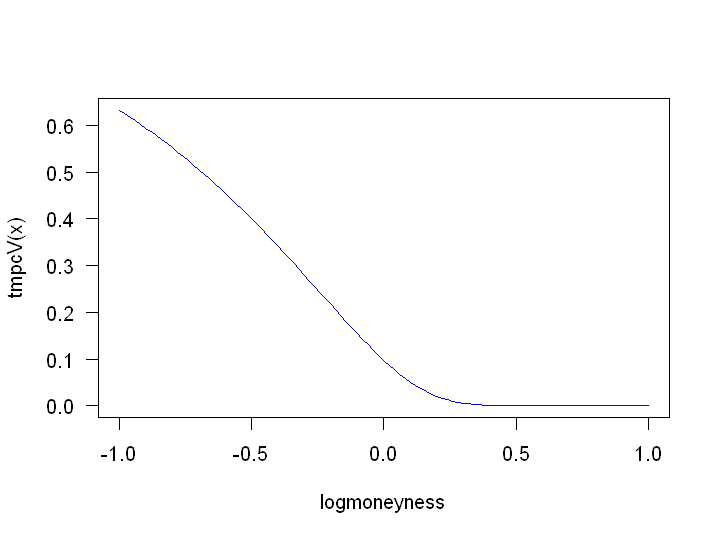

In [67]:
tmpc <- function(x) callOption(phiHeston(params), x, 1)
tmpcV <- function(x) sapply(x, tmpc)
curve(tmpcV, from=-1, to=1, col='blue', xlab='logmoneyness', las=1)